# Plots a bar graph representing the number of docstring errors.

To generate the file in `json` format, the following command needs to be executed in `master` branch clone of pandas,
after completing the development environment setup.

`./scripts/validate_docstrings.py --format=json > /path/to/json/pandas_docstring_errors.json`

This script currently supports pandas version >= 0.25.0

In [1]:
import pandas

In [2]:
path = '../json/pandas_docstring_errors.json.zip'
df = (pandas.read_json(path, compression='zip')
            .transpose()
            .filter(items=['errors'])
            .explode('errors')
            .dropna()
            .reset_index()
     )

Splits a list in a data entry into separate data columns

In [3]:
df[['error_code','error_name']] = pandas.DataFrame(df.errors.tolist(), index=df.index)
df = df.drop("errors", axis=1)

### Frequency of errors based on error codes

In [4]:
pandas.DataFrame(df['error_code'].value_counts())

,error_code
GL08,517
PR09,459
PR01,405
RT03,355
PR07,319
SA04,310
PR06,267
EX03,247
PR02,237
SS06,212


### Frequency plot of errors based on error codes

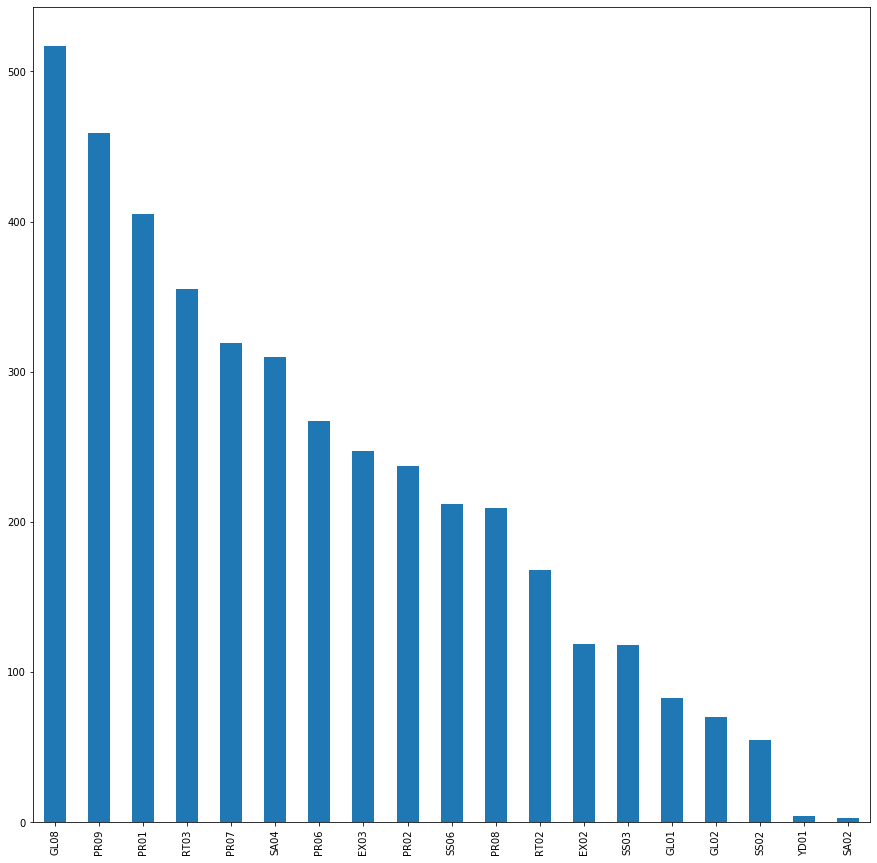

In [7]:
df['error_code'].value_counts().plot(x='error_code', 
                                     y='frequency', 
                                     kind='bar', 
                                     figsize=(15, 15),
                                    )

### Frequency of errors based on error names

In [6]:
pandas.DataFrame(df['error_name'].value_counts().head())

,error_name
The object does not have a docstring,517
Return value has no description,355
Summary should fit in a single line,212
"The first line of the Returns section should contain only the type, unless multiple values are being returned",168
"Parameters {*args, **kwargs} not documented",163
